In [ ]:
# experimental: you can run this cell to see your code full-width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
# starting code:

In [5]:
# the usual imports
import pprint as pp
import json

In [6]:

# this function just loads the data from files
def load_json_file_named(file_name):
    try: 
        loaded_data = []
        file_location = f"data/{file_name}"
        with open(file_location, 'r') as file: # or f"data/{file_name}" depending on your files
            loaded_data =  json.load(file)
    except OSError as e:
        print(f"Error. Does the file exist in this folder? {file_location}\n\n {e}")
    return loaded_data

In [7]:
boards_info = load_json_file_named('nhs_scotland_boards.json')
covid_days = load_json_file_named('covid_records_scotland.json')
cancer_waiting_times = load_json_file_named('cancer_waiting_times.json')
boards_code_lookup = load_json_file_named('boards_code_lookup.json')

# Datasets: 

Used 4 datasets in the analysis, described below:

- boards_info
- covid_days
- cancer_waiting_times

### First and Second Dataset: NHS boards and Covid days


- boards_info contains information about nhs boards 
- covid_days contains information patients in the first 2 years of covid pandemic

In [4]:
# this is how data looks like:
pp.pprint(boards_info[0])

{'budget_millions': {'2020': 762, '2021': 775, '2022': 807},
 'geographic': {'area_km_2': 2924,
                'areas_covered': 'East Ayrshire, North Ayrshire, South '
                                 'Ayrshire'},
 'name': 'NHS Ayrshire and Arran',
 'people': {'patients': 369670, 'staff': 9491}}


In [5]:
import pandas as pd
pd.DataFrame(boards_info).to_excel('output.xlsx')

In [8]:
# this is how second data looks like:
pp.pprint(covid_days[10])


{'date': 20200309,
 'locations': {'NHS Ayrshire and Arran': {'first_infections': 1,
                                          'new_deaths': 0,
                                          'new_positive': 1,
                                          'reinfections': 0},
               'NHS Borders': {'first_infections': 1,
                               'new_deaths': 0,
                               'new_positive': 1,
                               'reinfections': 0},
               'NHS Dumfries and Galloway': {},
               'NHS Fife': {'first_infections': 1,
                            'new_deaths': 0,
                            'new_positive': 1,
                            'reinfections': 0},
               'NHS Forth Valley': {'first_infections': 0,
                                    'new_deaths': 0,
                                    'new_positive': 0,
                                    'reinfections': 0},
               'NHS Grampian': {'first_infections': 0,
              

In [19]:
#Check for different NHS names
nhs_names = []
for i in range(len(boards_info)):
    nhs_names.append(boards_info[i]['name'])
print(nhs_names)

['NHS Ayrshire and Arran', 'NHS Borders', 'NHS Dumfries and Galloway', 'NHS Fife', 'NHS Forth Valley', 'NHS Grampian', 'NHS Greater Glasgow and Clyde', 'NHS Highland', 'NHS Lanarkshire', 'NHS Lothian', 'NHS Orkney', 'NHS Shetland', 'NHS Tayside', 'NHS Western Isles']


In [20]:
#Patient Count
patients_count = []
for i in range(len(boards_info)):
    patients_count.append(boards_info[i]['people']['patients'])
print(patients_count)  

[369670, 115270, 148790, 371910, 306070, 584550, 1174980, 321800, 659200, 897770, 22190, 22990, 416080, 26830]


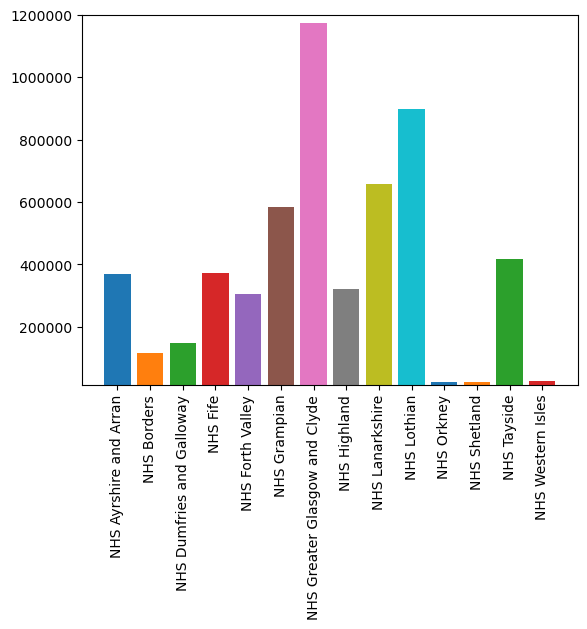

In [43]:
#Graph showinf patient count in each NHS
import matplotlib.pyplot as plt

for i in range(len(boards_info)):
    plt.bar(nhs_names[i],patients_count[i])
plt.ylim(15000, 1200000)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 'vertical')
plt.show()

In [46]:
pp.pprint(covid_days)

[{'date': 20200228,
  'locations': {'NHS Ayrshire and Arran': {},
                'NHS Borders': {},
                'NHS Dumfries and Galloway': {},
                'NHS Fife': {},
                'NHS Forth Valley': {},
                'NHS Grampian': {},
                'NHS Greater Glasgow and Clyde': {},
                'NHS Highland': {},
                'NHS Lanarkshire': {},
                'NHS Lothian': {},
                'NHS Orkney': {},
                'NHS Shetland': {},
                'NHS Tayside': {'first_infections': 1,
                                'new_deaths': 0,
                                'new_positive': 1,
                                'reinfections': 0},
                'NHS Western Isles': {}},
  'whole_scotland': {'first_infections': 1,
                     'new_deaths': 0,
                     'new_positive': 1,
                     'reinfections': 0}},
 {'date': 20200229,
  'locations': {'NHS Ayrshire and Arran': {},
                'NHS Borders':

# To compare COVID-19 reinfection count in different NHS Units

In [73]:
reinfect_dict  = {}
for i in range(len(covid_days)):
    year = int(str(covid_days[i]['date'])[:4])
    
    reinfect_dict[year] = {}

    for k in range(len(covid_days[i]['locations'])):

        
        board_name = list(covid_days[i]['locations'].keys())[k]
        
        board_cases = covid_days[i]['locations'][board_name]
        #print(covid_days[i]['locations'][board_name])
        if len(board_cases) != 0:
            reinfections_per_day = covid_days[i]['locations'][board_name].get('reinfections')   
        
             
            if reinfect_dict[year].get(board_name) == None:
                reinfect_dict[year][board_name] = reinfections_per_day
            else:
                reinfect_dict[year][board_name] = reinfect_dict[year][board_name] + reinfections_per_day

                
pp.pprint(reinfect_dict)     

{2020: {'NHS Ayrshire and Arran': 0,
        'NHS Borders': 0,
        'NHS Dumfries and Galloway': 0,
        'NHS Fife': 0,
        'NHS Forth Valley': 1,
        'NHS Grampian': 1,
        'NHS Greater Glasgow and Clyde': 1,
        'NHS Highland': 0,
        'NHS Lanarkshire': 1,
        'NHS Lothian': 1,
        'NHS Orkney': 0,
        'NHS Shetland': 0,
        'NHS Tayside': 0,
        'NHS Western Isles': 0},
 2021: {'NHS Ayrshire and Arran': 154,
        'NHS Borders': 20,
        'NHS Dumfries and Galloway': 33,
        'NHS Fife': 108,
        'NHS Forth Valley': 63,
        'NHS Grampian': 107,
        'NHS Greater Glasgow and Clyde': 484,
        'NHS Highland': 56,
        'NHS Lanarkshire': 278,
        'NHS Lothian': 200,
        'NHS Orkney': 0,
        'NHS Shetland': 0,
        'NHS Tayside': 107,
        'NHS Western Isles': 0},
 2022: {'NHS Ayrshire and Arran': 76,
        'NHS Borders': 12,
        'NHS Dumfries and Galloway': 13,
        'NHS Fife': 25,
        

In [86]:
nhs_dic = {}

nhs_lists = list(reinfect_dict.get(2020).keys())
    
#print(len(nhs_lists))

for i in range(len(nhs_lists)):
    for j in list(reinfect_dict.keys()):
        
        if nhs_dic.get(nhs_lists[i]) == None:
            nhs_dic[nhs_lists[i]] = {}
            nhs_dic[nhs_lists[i]][j] = reinfect_dict.get(j).get(nhs_lists[i])

        else:        
            nhs_dic[nhs_lists[i]][j] = reinfect_dict.get(j).get(nhs_lists[i])

pp.pprint(nhs_dic)


{'NHS Ayrshire and Arran': {2020: 0, 2021: 154, 2022: 76},
 'NHS Borders': {2020: 0, 2021: 20, 2022: 12},
 'NHS Dumfries and Galloway': {2020: 0, 2021: 33, 2022: 13},
 'NHS Fife': {2020: 0, 2021: 108, 2022: 25},
 'NHS Forth Valley': {2020: 1, 2021: 63, 2022: 32},
 'NHS Grampian': {2020: 1, 2021: 107, 2022: 39},
 'NHS Greater Glasgow and Clyde': {2020: 1, 2021: 484, 2022: 153},
 'NHS Highland': {2020: 0, 2021: 56, 2022: 20},
 'NHS Lanarkshire': {2020: 1, 2021: 278, 2022: 144},
 'NHS Lothian': {2020: 1, 2021: 200, 2022: 102},
 'NHS Orkney': {2020: 0, 2021: 0, 2022: 1},
 'NHS Shetland': {2020: 0, 2021: 0, 2022: 0},
 'NHS Tayside': {2020: 0, 2021: 107, 2022: 40},
 'NHS Western Isles': {2020: 0, 2021: 0, 2022: 5}}


['NHS Ayrshire and Arran', 'NHS Borders', 'NHS Dumfries and Galloway', 'NHS Fife', 'NHS Forth Valley', 'NHS Grampian', 'NHS Greater Glasgow and Clyde', 'NHS Highland', 'NHS Lanarkshire', 'NHS Lothian', 'NHS Orkney', 'NHS Shetland', 'NHS Tayside', 'NHS Western Isles']
range(0, 14)


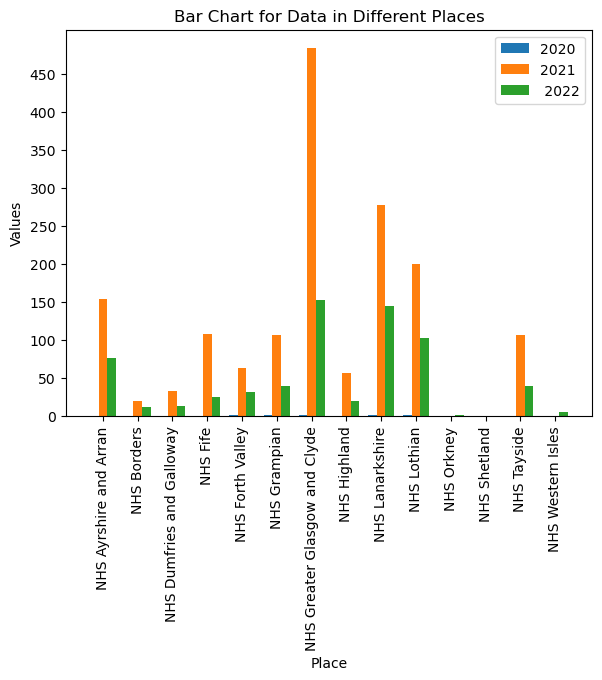

range(0, 14)


In [101]:
print(nhs_lists)
list_2020 = [nhs_dic[place][2020] for place in nhs_lists]
list_2021 = [nhs_dic[place][2021] for place in nhs_lists]
list_2022 = [nhs_dic[place][2022] for place in nhs_lists]
    
bar_width = 0.25
index = range(len(nhs_lists))
print(index)
plt.bar(index, list_2020, width=bar_width, label='2020')
plt.bar([i + bar_width for i in index], list_2021, width=bar_width, label='2021')
plt.bar([i + 2 * bar_width for i in index], list_2022, width=bar_width, label=" 2022")

# Set labels, title, and legend
plt.xlabel("Place")
plt.ylabel("Values")
plt.title("Bar Chart for Data in Different Places")
plt.xticks([i + bar_width for i in index], nhs_lists)
plt.legend()
plt.tight_layout()
plt.yticks(list(range(0, 500, 50)))
plt.xticks(rotation = 'vertical')
plt.show()
print(index)

# Third dataset: Cancer waiting times:

cancer_waiting_times is a json dataset with numbers on how many cancer patients were treated within 1 month of being diagnosed.

You will find in it information about year and quarter of when data was gathered, cancer type, numbers of patients, NHS board*

*(board comes as an id. You can look it up in the variable boards_code_lookup) 

For more information about the data you can lookup the source:

https://www.opendata.nhs.scot/dataset/cancer-waiting-times/resource/58527343-a930-4058-bf9e-3c6e5cb04010?inner_span=True

To check cancer diagosed & treated Counts across different cancer types

In [9]:
pp.pprint(cancer_waiting_times)

[{'Board_id': 'S08000015',
  'Cancer_types': {'Breast': {'diagnosed': 88, 'treated': 88},
                   'Cervical': {'diagnosed': 5, 'treated': 5},
                   'Colorectal': {'diagnosed': 56, 'treated': 55},
                   'Head & Neck': {'diagnosed': 17, 'treated': 16},
                   'Lung': {'diagnosed': 6, 'treated': 6},
                   'Lymphoma': {'diagnosed': 25, 'treated': 25},
                   'Melanoma': {'diagnosed': 17, 'treated': 17},
                   'Ovarian': {'diagnosed': 12, 'treated': 12},
                   'Upper GI': {'diagnosed': 42, 'treated': 42},
                   'Urological': {'diagnosed': 66, 'treated': 64}},
  'Quarter': 1,
  'Year': 2012},
 {'Board_id': 'S08000016',
  'Cancer_types': {'Breast': {'diagnosed': 17, 'treated': 17},
                   'Cervical': {'diagnosed': 1, 'treated': 1},
                   'Colorectal': {'diagnosed': 20, 'treated': 20},
                   'Head & Neck': {'diagnosed': 4, 'treated': 4},
       

In [17]:
import pandas as pd
pd.DataFrame(cancer_waiting_times).to_excel('output2.xlsx')

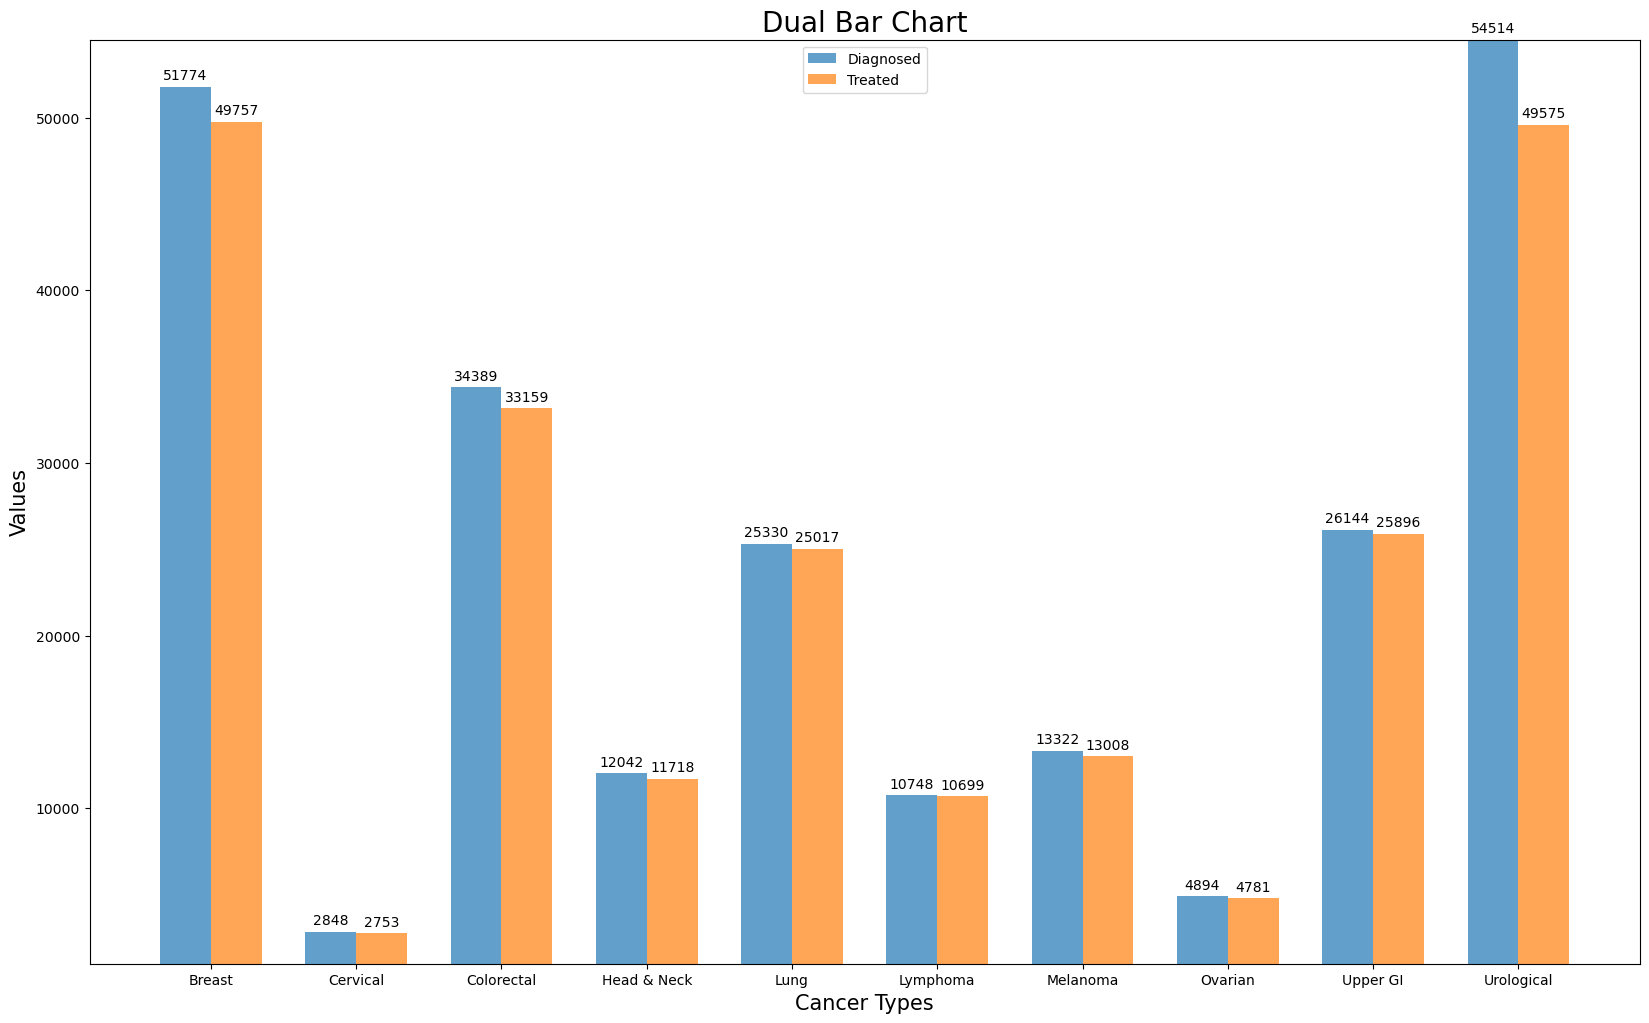

In [9]:
import matplotlib.pyplot as plt

ctype = set()
dict1 = {}
dict2 = {}

# Create placeholders for all cancer types
for entry in cancer_waiting_times:
    for cancer in entry['Cancer_types']:
        ctype.add(cancer)

ctype = sorted(list(ctype))

# Iterate through the data
for entry in cancer_waiting_times:
    year = entry['Year']
    for cancer in ctype:
        result = entry['Cancer_types'].get(cancer, {})
        diagnosed_sum = result.get('diagnosed', 0)
        treated_sum = result.get('treated', 0)
        if cancer in dict1:
            # Update existing records
            dict1[cancer]['Diagnosed'] += diagnosed_sum
            dict1[cancer]['Treated'] += treated_sum
        else:
            # Create a new record
            dict1[cancer] = {'Diagnosed': diagnosed_sum, 'Treated': treated_sum}
   
    # Store year-wise data
    dict2[year] = dict1.copy()
   
x1 = list(dict2.keys())  # Get the years from dict2
y1 = []
y2 = []

# Populate y1 and y2 lists based on x1

for year in x1:
    data = dict2.get(year, {})
   
for cancer in ctype:
    y1.append(data[cancer].get('Diagnosed', 0))
    y2.append(data[cancer].get('Treated', 0))

bar_width = 0.35

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 12))

# Calculate the x positions for the bars
x_positions = range(len(ctype))

# Plot the first set of bars (y1)
bars1=ax.bar(x_positions, y1, width=bar_width, label='Diagnosed', align='center', alpha=0.7)

# Calculate the x positions for the second set of bars (y2)
x_positions2 = [x + bar_width for x in x_positions]

# Plot the second set of bars (y2)
bars2=ax.bar(x_positions2, y2, width=bar_width, label='Treated', align='center', alpha=0.7)

# Set x-axis labels
ax.set_xticks([x + bar_width/2 for x in x_positions])
ax.set_xticklabels(ctype)

# Add labels and legend
ax.set_xlabel('Cancer Types', fontsize = 15)
ax.set_ylabel('Values', fontsize = 15)
ax.set_title('Dual Bar Chart', fontsize = 20)
ax.set_ylim(1000,max(y1))
ax.legend()

# Add values on top of the bars
def add_values(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.annotate(f'{value}',  # Text label
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of text label
                    xytext=(0, 3),  # Offset text above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bars1, y1)
add_values(bars2, y2)

# Show the plot
plt.show()


To check total cancer diagnosed and treated counts across different years

In [6]:
pp.pprint(cancer_waiting_times)

[{'Board_id': 'S08000015',
  'Cancer_types': {'Breast': {'diagnosed': 88, 'treated': 88},
                   'Cervical': {'diagnosed': 5, 'treated': 5},
                   'Colorectal': {'diagnosed': 56, 'treated': 55},
                   'Head & Neck': {'diagnosed': 17, 'treated': 16},
                   'Lung': {'diagnosed': 6, 'treated': 6},
                   'Lymphoma': {'diagnosed': 25, 'treated': 25},
                   'Melanoma': {'diagnosed': 17, 'treated': 17},
                   'Ovarian': {'diagnosed': 12, 'treated': 12},
                   'Upper GI': {'diagnosed': 42, 'treated': 42},
                   'Urological': {'diagnosed': 66, 'treated': 64}},
  'Quarter': 1,
  'Year': 2012},
 {'Board_id': 'S08000016',
  'Cancer_types': {'Breast': {'diagnosed': 17, 'treated': 17},
                   'Cervical': {'diagnosed': 1, 'treated': 1},
                   'Colorectal': {'diagnosed': 20, 'treated': 20},
                   'Head & Neck': {'diagnosed': 4, 'treated': 4},
       

In [33]:

#Objective: To plot Year vs Total Diagnosed Count & Treated Count in a Double bar grapgh

import matplotlib.pyplot as plt

#Get the list of Year
year_lst=set()

for entry in cancer_waiting_times:
    year=entry['Year']
    year_lst.add(year)

year_lst=list(set(year_lst))

#total diagnosed and treated counts for each year
l1_dict={}
l2_dict={}

for year in year_lst:
    diagnosed_sum=0
    treated_sum=0
    for entry in cancer_waiting_times:
        if year==entry['Year']:
            for types in entry['Cancer_types'].values():
                diagnosed_sum+=types['diagnosed']
                treated_sum+=types['treated']
           
            l1_dict[entry['Year']]={'diagnosed':diagnosed_sum,'treated':treated_sum}

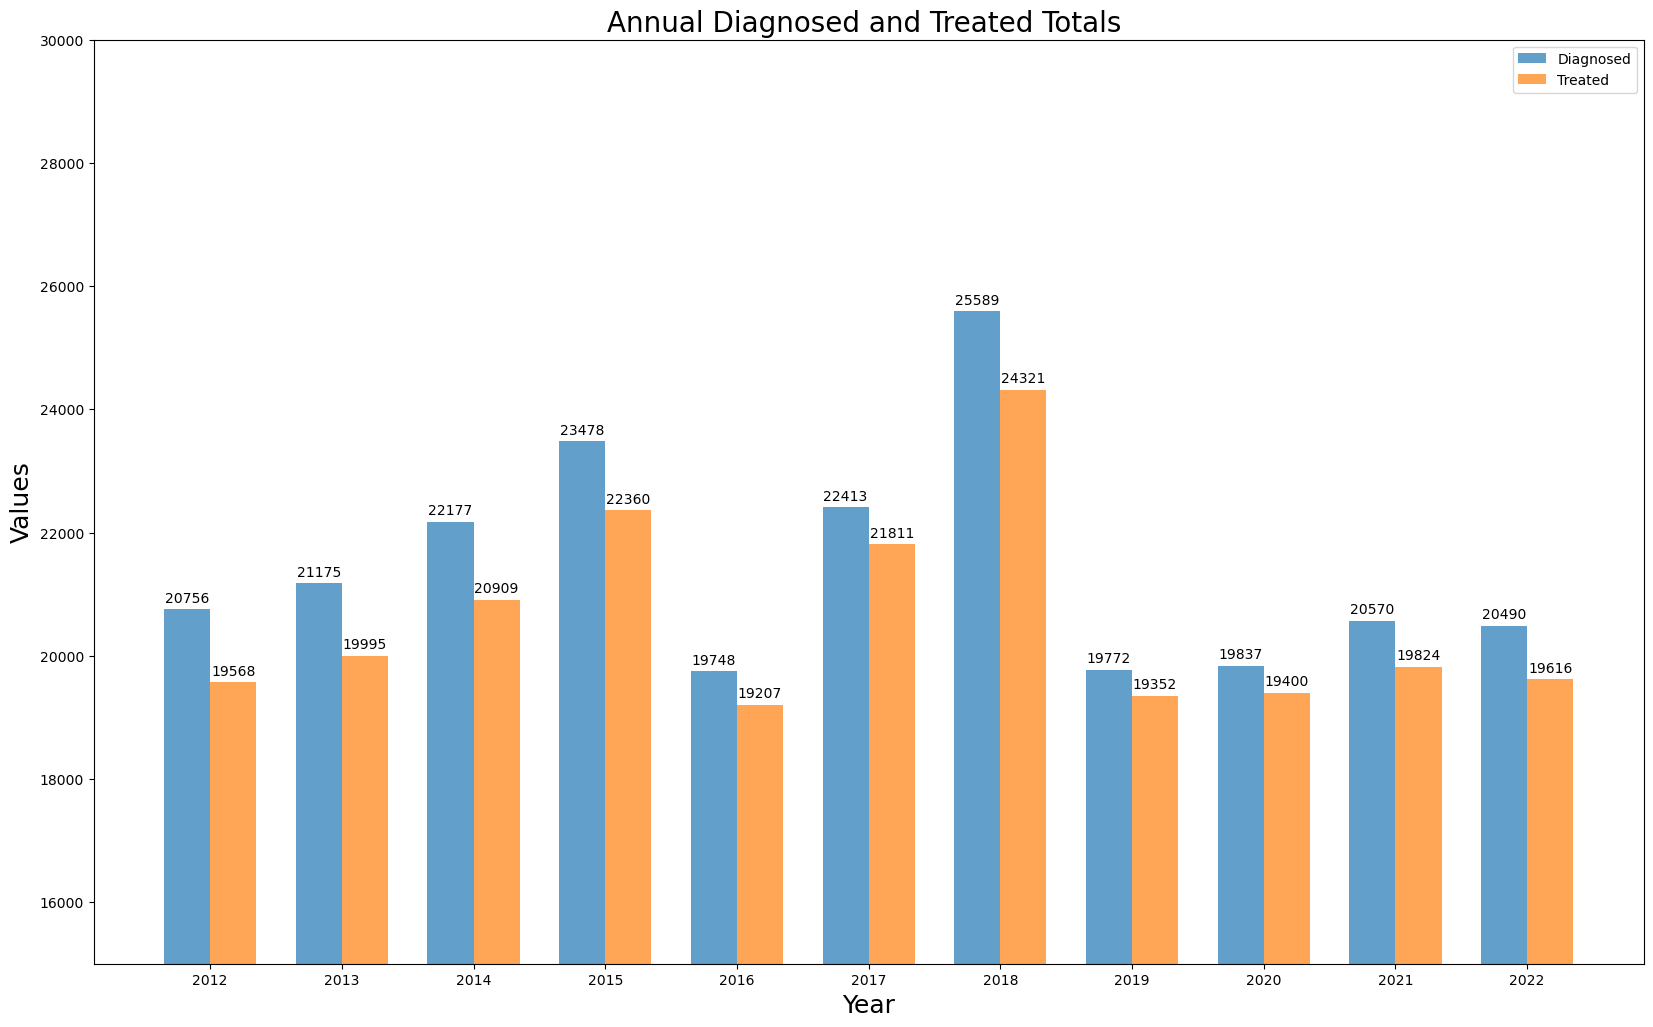

In [42]:


# Generate X and Y axes to plot grapgh
y_axis=[]
y1_axis=[]
x_axis=[]
for key,val in l1_dict.items():
    x_axis.append(key)
    x_axis.sort()
    y_axis.append(val['diagnosed'])
    y1_axis.append(val['treated'])
   

fig, ax = plt.subplots(figsize=(20, 12))

# Calculate the x positions for the bars
x_positions = range(len(x_axis))

# Plot the first set of bars (y1)
bar_width = 0.35
bars1=ax.bar(x_positions, y_axis, width=bar_width, label='Diagnosed', align='center', alpha=0.7)

# Calculate the x positions for the second set of bars (y2)
x_positions2 = [x + bar_width for x in x_positions]

# Plot the second set of bars (y2)
bars2=ax.bar(x_positions2, y1_axis, width=bar_width, label='Treated', align='center', alpha=0.7)

# Set x-axis labels
ax.set_xticks([x + bar_width/2 for x in x_positions])
ax.set_xticklabels(x_axis)

# Add labels and legend
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Values',fontsize=18)
ax.set_title('Annual Diagnosed and Treated Totals ',fontsize=20)
ax.set_ylim(15000,30000)
ax.legend()

# Add values on top of the bars
def add_values(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.annotate(f'{value}',  # Text label
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of text label
                    xytext=(0, 3),  # Offset text above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bars1, y_axis)
add_values(bars2, y1_axis)
# Show the plot
plt.show()


The *Annual Diagnosed and Treated* Totals bar graph illustrates a peak in diagnosed and treated cancer patients in 2018, 
followed by a decline in subsequent years, potentially resulting from improved prevention methods, changes in screening
practices, or shifts in population health behaviour.

This data is valuable for healthcare authorities to adapt policies and resource allocation, and the code generates a 
double bar graph displaying cancer case counts over different years, aiding policymakers in tracking healthcare trends 
and helping them identify patterns, like potential increases in diagnoses requiring resource reallocation.
This assessment of healthcare intervention effectiveness facilitates informed management decisions.

Overall, by providing a thorough perspective on the state of cancer care and prevention efforts, this visual
depiction serves a crucial role in promoting evidence-driven policymaking, ultimately helping to the improvement of
public health outcomes.